### Técnicas de pré-processamento de dados

* detecção de anomalias;
* discretização ou binarização;
* normalização;
* standartization.

#### Detecção de anomalias

In [1]:
import numpy

dados = [10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 
       453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 
       440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 
       512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 
       689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543,30, 1300, 1350, 1400]


dados = numpy.array(dados)
print(dados)

[  10  386  479  627   20  523  482  483  542  699  535  617  577  471
  615  583  441  562  563  527  453  530  433  541  585  704  443  569
  430  637  331  511  552  496  484  566  554  472  335  440  579  341
  545  615  548  604  439  556  442  461  624  611  444  578  405  487
  490  496  398  512  422  455  449  432  607  679  434  597  639  565
  415  486  668  414  665  763  557  304  404  454  689  610  483  441
  657  590  492  476  437  483  529  363  711  543   30 1300 1350 1400]


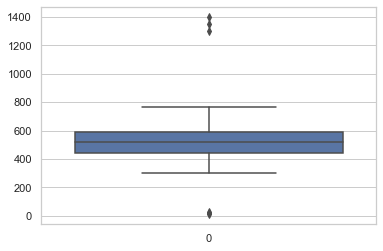

In [2]:
### Visualização de outliers.

%matplotlib inline
import seaborn as sns

sns.set(style = 'whitegrid', color_codes = True)
sns.boxplot(data = dados);

In [7]:
### Média:
mean = numpy.mean(dados, axis = 0)
mean

530.3673469387755

In [8]:
### Desvio padrão:
sd = numpy.std(dados, axis = 0)
sd

192.51166875607043

In [10]:
### Limite inferior:
li = mean - 2*sd
li

145.34400942663467

In [11]:
### Limite superior:
ls = mean + 2*sd
ls

915.3906844509164

In [12]:
### Listando os valores abaixo do limite inferior:
for x in dados:
    if(x < li):
        print(x)

10
20
30


In [13]:
### Listando os valores acima do limite superior:
for x in dados:
    if(x > ls):
        print(x)

1300
1350
1400


In [14]:
### Removendo os valores abaixo do limite inferior:
dados = [x for x in dados if(x > li)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543, 1300, 1350, 1400]


In [16]:
### Removendo os valores acima do limite superior:
dados = [x for x in dados if(x < ls)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 530, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 579, 341, 545, 615, 548, 604, 439, 556, 442, 461, 624, 611, 444, 578, 405, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 679, 434, 597, 639, 565, 415, 486, 668, 414, 665, 763, 557, 304, 404, 454, 689, 610, 483, 441, 657, 590, 492, 476, 437, 483, 529, 363, 711, 543]


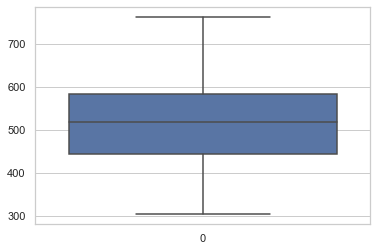

In [18]:
### Visualizando os valores novamente:
sns.boxplot(data = dados);

#### Discretização

In [19]:
import pandas as pd

In [20]:
altura = [1.5, 1.57, 1.62, 1.7, 1.85, 1.9]

In [21]:
altura = pd.qcut(altura, 3, labels = ['P', 'M', 'G'])

In [22]:
print(altura)

['P', 'P', 'M', 'M', 'G', 'G']
Categories (3, object): ['P' < 'M' < 'G']


In [24]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

In [25]:
dataset = pd.read_csv('kc_house_data.csv')

In [26]:
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [27]:
dataset['floors_labels'] = pd.cut(
        dataset['floors'], 5,
        labels = ['Muito pequeno', 'Pequeno', 'Médio', 'Grande', 'Muito grande'])

In [28]:
dataset['floors_labels'].value_counts()

Muito pequeno    12589
Pequeno           8241
Grande             613
Médio              161
Muito grande         8
Name: floors_labels, dtype: int64

In [29]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


In [30]:
dataset['floors_labels'].unique()

['Muito pequeno', 'Pequeno', NaN, 'Grande', 'Médio', 'Muito grande']
Categories (5, object): ['Muito pequeno' < 'Pequeno' < 'Médio' < 'Grande' < 'Muito grande']

#### Normalização

In [31]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
data = [[-1, 2], [0.5, 6], [0, 10], [1, 18]]
data

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]

In [34]:
np.mean(data)

4.5625

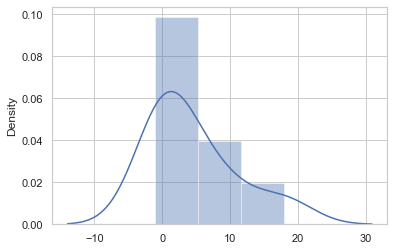

In [35]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

In [36]:
normalizer = Normalizer().fit(data)

In [37]:
data2 = normalizer.transform(data)
data2

array([[-0.4472136 ,  0.89442719],
       [ 0.08304548,  0.99654576],
       [ 0.        ,  1.        ],
       [ 0.05547002,  0.99846035]])

In [38]:
np.mean(data2)

0.4475919008033141

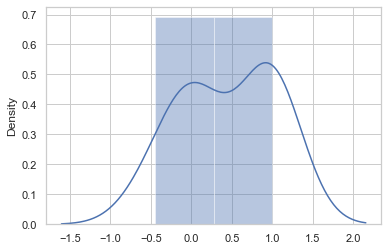

In [40]:
sns.distplot(data2.reshape(-1))
plt.show()

#### Standartization

In [41]:
data = np.random.normal(size = 50)
data

array([-0.1276304 , -0.09571368, -0.20046476,  0.42950115, -1.88757074,
        1.11560553, -0.2455885 , -0.39722307, -0.94251324, -0.70772209,
        1.19507817,  0.46169618, -2.37069286, -0.92673336,  1.21221158,
        0.82181441, -0.71013642, -0.47373366,  0.47474057, -0.19821818,
       -0.11707192, -0.14081491,  0.10988218, -0.31636785, -0.89371297,
        1.50287298,  0.06013593, -0.16274245,  2.17872421,  1.70401326,
        0.19157987, -0.3903395 , -0.41422665, -0.44117366, -1.69522504,
       -0.77378705, -0.39627624, -0.49350191, -0.83299354, -1.09639855,
        0.33507252, -0.35576453, -0.00853275,  1.39658415,  0.04796077,
       -1.46926744,  0.2345211 ,  1.27160597,  0.05654142,  1.48983965])

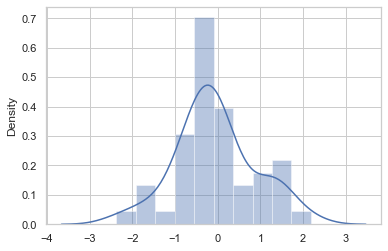

In [42]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

In [43]:
### MinMaxScaler (valores entre 0 e 1).

from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler().fit(np.array(data).reshape(-1, 1))

In [48]:
data_scaled = scaler.transform(np.array(data).reshape(-1, 1))

In [50]:
print(data_scaled)

[[0.49304393]
 [0.50005949]
 [0.47703433]
 [0.61550611]
 [0.10619429]
 [0.76631761]
 [0.46711575]
 [0.4337852 ]
 [0.31392585]
 [0.36553491]
 [0.78378636]
 [0.62258285]
 [0.        ]
 [0.3173944 ]
 [0.78755243]
 [0.70173985]
 [0.36500422]
 [0.41696753]
 [0.62545012]
 [0.47752814]
 [0.49536477]
 [0.49014586]
 [0.54525118]
 [0.45155785]
 [0.32465256]
 [0.85144224]
 [0.53431654]
 [0.48532601]
 [1.        ]
 [0.89565456]
 [0.56320902]
 [0.43529827]
 [0.43004767]
 [0.42412449]
 [0.14847349]
 [0.35101328]
 [0.43399332]
 [0.4126223 ]
 [0.3379992 ]
 [0.28010057]
 [0.59474991]
 [0.44289813]
 [0.51922259]
 [0.82807906]
 [0.53164034]
 [0.19814086]
 [0.57264786]
 [0.80060781]
 [0.53352644]
 [0.8485774 ]]


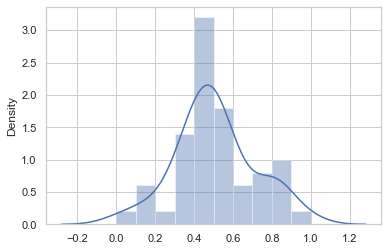

In [51]:
sns.distplot(np.array(data_scaled).reshape(-1))
plt.show()

In [ ]:
### StandardScaler

## Padroniza a escala dos dados sem interferir na sua forma.
## Mantém a escala dos dados mais fiel que a técnica MinMaxScaler.

In [52]:
data = np.random.normal(size = 50)

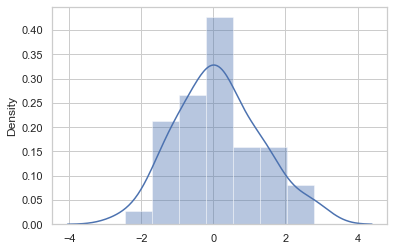

In [53]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

In [54]:
### StandardScaler (escalonamento mais suave).

from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler().fit(np.array(data).reshape(-1, 1))

In [59]:
data_scaled = scaler.transform(np.array(data).reshape(-1, 1))

In [62]:
data_scaled

array([[-1.50505322e-02],
       [ 1.25027220e+00],
       [-7.73053739e-01],
       [-1.33200567e+00],
       [ 1.11905760e+00],
       [-2.25116536e+00],
       [-7.91858038e-02],
       [-5.07534638e-01],
       [-3.46067375e-01],
       [-1.26922467e+00],
       [ 6.01777631e-01],
       [-7.47842267e-01],
       [ 5.53167920e-01],
       [-6.39392937e-01],
       [ 2.19369855e+00],
       [-1.52125389e+00],
       [ 1.35768756e+00],
       [ 1.95717738e-01],
       [ 8.69182334e-01],
       [ 2.06803909e-01],
       [ 1.37896796e+00],
       [-1.10164601e+00],
       [-1.37188021e-01],
       [-2.69734651e-02],
       [-2.94435285e-01],
       [-6.39938591e-01],
       [-4.51881474e-02],
       [ 2.11017274e-01],
       [-9.33355646e-01],
       [ 2.12011236e-01],
       [ 1.30834728e-01],
       [ 2.30208954e+00],
       [-1.58798144e+00],
       [ 2.94290842e-01],
       [ 2.99357415e-03],
       [-5.09629841e-01],
       [ 2.07377599e+00],
       [ 9.77835436e-01],
       [ 1.2

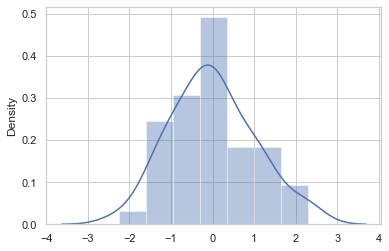

In [60]:
sns.distplot(np.array(data_scaled).reshape(-1))
plt.show()